# Q1 - Sampling
## 1) Write a pseudocode from the given multinomial distribution
<br>
Given multinomial distribution, p, we can define the range of the intervals of the categories as the following table


| Categories             | Movies | COMP-551 | Playing | Studying |
|------------------------|--------|----------|---------|----------|
| Probabilities          | 0.2    | 0.4      | 0.1     | 0.3      |
| Limits of the subInterval | 0.2    | 0.6      | 0.7     | 1.0      |


For example, Category "COMP-551" ranges from 0.2 to  0.6


Then the sampling of the activity from the distribution can be written as below


```python
# Pseudocode: Sampling activity from p
activity = ""
s = Random number in range [0,1]
if s < 0.2 then 
    activity is "Movie"
else if s >= 0.2 and s < 0.6 then 
    activity is "COMP-551"
else if s >= 0.6 and s < 0.7 then 
    activity is "Playing"
else if s >= 0.7 then 
    activity is "Studying"
end 
```


## 2)  Implement the algorithm

In [3]:
import random

def sample(n):
  '''
  input : number of days, n
  output : count of each activity 
  
  Everytime an activity is sampled, the corresponding variable will be incremented.
  ex) if s = 0.1234567 then it will increment the variable "movie" 
  '''
  movies, comp551, playing, studying = 0,0,0,0
  for i in range(0, n):
    # generate random number from 0 to 1
    s = random.random()
    if s < 0.2:
      movies += 1
    elif s >= 0.2 and s < 0.6:
      comp551 += 1
    elif s >= 0.6 and s < 0.7:
      playing += 1
    elif s >= 0.7:
      studying += 1
  
  return [movies, comp551, playing, studying]


def report(categories, result):
  '''
  print results from function "sample"
  '''
  n = sum(result)
  print("Reporting fraction of activities that are sampled for {} days: ".format(n))
  for c, r in zip(categories, result):
    print("{} : {}%".format(c, 100*r/n))


    
categories = ("Movies", "COMP-551", "Playing", "Studying" )



In [4]:
# 100 days
report(categories, sample(100))


Reporting fraction of activities that are sampled for 100 days: 
Movies : 16.0%
COMP-551 : 39.0%
Playing : 9.0%
Studying : 36.0%


In [5]:
# 1000 days
report(categories, sample(1000))


Reporting fraction of activities that are sampled for 1000 days: 
Movies : 20.3%
COMP-551 : 40.4%
Playing : 10.6%
Studying : 28.7%


In conclusion, we can observe that the fraction fo the activities are getting closer to the defined multinomial distribution as the value of the "day" increased (i.e. more data). 



---
# Q2 - Model Selection
## 1) Fitting without regularization

In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [139]:
# Generate N x P matrix X from input x 
def genX(x, degree):
    X = np.ones((len(x), degree+1))
    for i in range(len(x)):
        for j in range(degree + 1):
            X[i][j] = x[i]**j
    return X

# w* = (X^TX)^-1 * X^TY
def genWeights(X,y):
    w_temp = np.dot(X.T, X)
    w_temp = np.linalg.inv(w_temp)
    w_temp = np.dot(w_temp, X.T)
    w = np.dot(w_temp, y)
    return w

# given a input x and weights, predict ouput y
def predict_y(weights, x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(weights)):
            y[i] += (weights[j] * (x[i]**j))
    return y

# calculate MSE
def MSE(predictions, targets):
    return sum([(predictions[i] - targets[i]) ** 2 for i in range(len(targets))])/len(targets)

#return np.square(np.subtract(predictions, targets)).mean()
    

In [140]:
# My data directory
data_dir = os.path.join(os.path.dirname(os.path.realpath('__file__')), 'Datasets')

# prepare data
csv_train = os.path.join(data_dir, 'Dataset_1_train.csv')
csv_valid = os.path.join(data_dir, 'Dataset_1_valid.csv')
csv_test = os.path.join(data_dir, 'Dataset_1_test.csv')

train = np.genfromtxt(csv_train, delimiter=',', dtype=np.float)[:,:2]
valid = np.genfromtxt(csv_valid, delimiter=',', dtype=np.float)[:,:2]
test = np.genfromtxt(csv_test, delimiter=',', dtype=np.float)[:,:2]

train_x = train[:,0]
train_y = train[:,1]
valid_x = valid[:,0]
valid_y = valid[:,1]
test_x = test[:,0]
test_y = test[:,1]

Result:

	Training MSE : 6.474704005055272
	Validation MSE : 1417.8987342087937
	Test MSE : 50.653633644260964


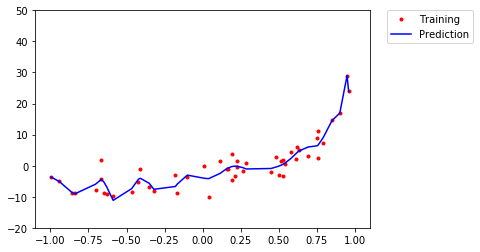

In [141]:
# 20-degree polynomial
DEGREE = 20

train_X = genX(train_x, DEGREE)  

w = genWeights(train_X, train_y)

train_yp = predict_y(w, train_x)
valid_yp = predict_y(w, valid_x)
test_yp = predict_y(w, test_x)

print("Result:\n")
print("\tTraining MSE : {}".format(MSE(train_yp, train_y)))
print("\tValidation MSE : {}".format(MSE(valid_yp, valid_y)))
print("\tTest MSE : {}".format(MSE(test_yp, test_y)))

plt.plot(train_x, train_y, 'r.', label = "Training")
new_x, new_y = zip(*sorted(zip(train_x, train_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1.1,1.1,-20, 50])
plt.show()

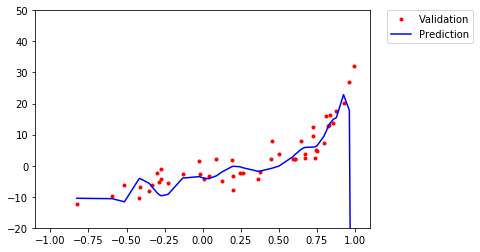

In [142]:
plt.plot(valid_x, valid_y, 'r.', label = "Validation")
new_x, new_y = zip(*sorted(zip(valid_x, valid_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1.1,1.1,-20, 50])
plt.show()

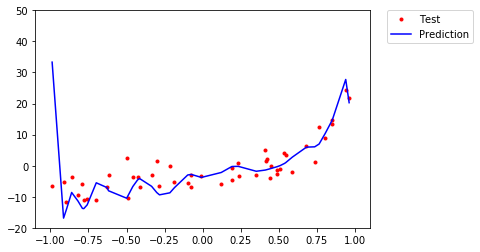

In [143]:
plt.plot(test_x, test_y, 'r.', label = "Test")
new_x, new_y = zip(*sorted(zip(test_x, test_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([-1.1,1.1,-20, 50])
plt.show()

In conculsion, The calculated MSE for Training set and Validation set is ~6.5 and ~1417.9.
Moreover, we can observe that our prediction model shows excellent fit for training set, but not for the validation set.
<br>
The prediction shows poor representation of the function and it indicates that the model is overfitting (Low MSE for training set, but high MSE for validation). More accurate prediction can be achieved by adding more data points or adding a penalty term to the error function to control coefficients (i.e. discouraging them from reaching large values)
<br>


## 2) L2 Regularization method


In [164]:
# w* = (X^TX + λI)^-1 * X^TY
def genL2Weights(X, y, lamda, degree):
    w_temp = np.dot(X.T, X) + lamda * np.identity(degree+1)
    w_temp = np.linalg.inv(w_temp)
    w = np.dot(np.dot(w_temp, X.T), y)
    return w


# generate all MSE values for lamda between 0 to 1
def L2Regularization(train_x, train_y, valid_x, valid_y, degree=20, step=0.0001):
    # initially set MSE as a big number and find optimal lamda 
    train_MSE = []
    valid_MSE = []
    lamdas = []
    weights = []
    temp_lamda = step
    X = genX(train_x, degree)
    while temp_lamda < 1:
        w = genL2Weights(X, train_y, temp_lamda, degree)
        new_train_y = predict_y(w, train_x)
        new_valid_y = predict_y(w, valid_x)
        train_MSE.append(MSE(new_train_y, train_y))
        valid_MSE.append(MSE(new_valid_y, valid_y))
        lamdas.append(temp_lamda)
        weights.append(w)
        temp_lamda += step
    return lamdas, train_MSE, valid_MSE, weights

# get results
lamdas, train_MSE, valid_MSE, weights = L2Regularization(train_x, train_y, valid_x, valid_y)


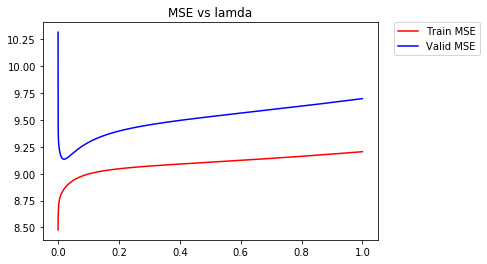

The best lamda is 0.019699999999999936, which has the minimum MSE, 9.135083473007535, for the valid set


In [171]:
# plot the graph for MSE
plt.plot(lamdas, train_MSE, 'r', label = "Train MSE")
plt.plot(lamdas, valid_MSE, 'b', label = "Valid MSE")
plt.title("MSE vs lamda")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# get best lamda
idx = np.argmin(valid_MSE)
minMSE = valid_MSE[idx]
bestLamda = lamdas[idx]
bestW = weights[idx]


print('The best lamda is {}, which has the minimum MSE, {}, for the valid set'.format(bestLamda, minMSE))


Result:

	Training MSE : 8.856456800480217
	Validation MSE : 9.135083473007535
	Test MSE : 10.732301005331


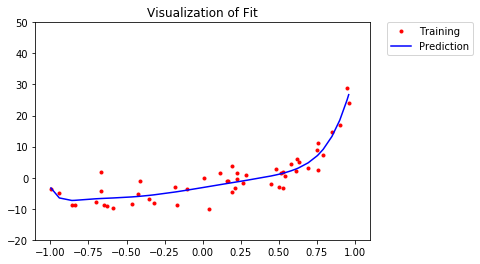

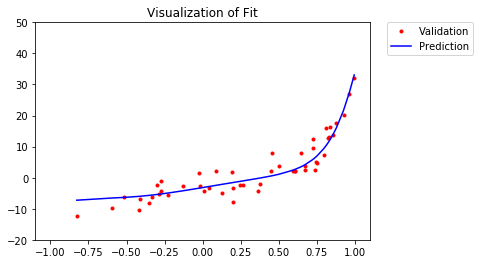

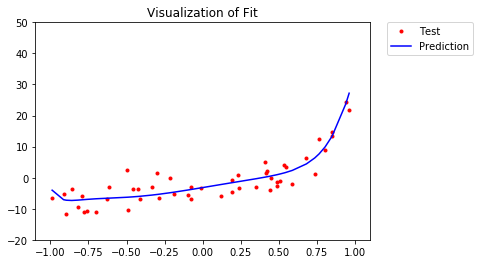

In [174]:
# plot the fit for training, validation, and test set
train_yp = predict_y(bestW, train_x)
valid_yp = predict_y(bestW, valid_x)
test_yp = predict_y(bestW, test_x)

print("Result:\n")
print("\tTraining MSE : {}".format(MSE(train_yp, train_y)))
print("\tValidation MSE : {}".format(MSE(valid_yp, valid_y)))
print("\tTest MSE : {}".format(MSE(test_yp, test_y)))

plt.plot(train_x, train_y, 'r.', label = "Training")
new_x, new_y = zip(*sorted(zip(train_x, train_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fit")
plt.axis([-1.1,1.1,-20, 50])
plt.show()

plt.plot(valid_x, valid_y, 'r.', label = "Validation")
new_x, new_y = zip(*sorted(zip(valid_x, valid_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fit")
plt.axis([-1.1,1.1,-20, 50])
plt.show()

plt.plot(test_x, test_y, 'r.', label = "Test")
new_x, new_y = zip(*sorted(zip(test_x, test_yp)))
plt.plot(new_x, new_y, 'b-', label="Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fit")
plt.axis([-1.1,1.1,-20, 50])
plt.show()

Adding L2 regulation improved the fit greatly compared to the method without regulation. 
In addition, the model has been tested with the seperate test set to see the true performance. With current data, it seems the chosen lamda and the weights are good model where the fit is neither overfitting nor underfitting. However, it would require more data to conclude the model is truely good or not. 

## 3) What do you think is the degree of the source polynomial? 

By observation, the shape of the fit looks like an exponential graph or a polynomial with even degrees. 

# Q3 - Gradient Descent for Regression
## 1)